Name: Jodi Heen

Unit 10: SQL-Alchemy Challenge

In [2]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [3]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [110]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [111]:
from flask import jsonify

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

# Initial Database Exploration

The following show some initial queries of the database classes to see the information stored inside and how it's organized.

In [16]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [125]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [126]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [127]:
# Print the measurement class 
first_rowM = session.query(Measurement).first()
first_rowM.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x128bcbc10>,
 'station': 'USC00519397',
 'prcp': 0.08,
 'date': '2010-01-01',
 'tobs': 65.0,
 'id': 1}

In [20]:
# Print the station class
first_rowS = session.query(Station).first()
first_rowS.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x11f676110>,
 'name': 'WAIKIKI 717.2, HI US',
 'longitude': -157.8168,
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

In [21]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [129]:
# Get a list of column names and types for measurement class
columns = inspector.get_columns('Measurement')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [131]:
# Get a list of column names and types for station class
columns = inspector.get_columns('Station')
for c in columns:
    print(c['name'], c["type"])
# columns

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [24]:
engine.execute('SELECT * FROM measurement LIMIT 2').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0)]

In [54]:
#  STATION CLASS DF
results = session.query(Station.id, Station.station, Station.name, Station.latitude, Station.longitude, Station.elevation).\
    order_by(Station.id.desc()).all()

# Load the results into a pandas dataframe. Set the index to the `emoji_id`
df_stn = pd.DataFrame(results[:10], columns=['id', 'station', 'score', 'lat', 'lon', 'elevation'])
df_stn.set_index('id', inplace=True, )
df_stn

,station,score,lat,lon,elevation
id,,,,,
9,USC00516128,"MANOA LYON ARBO 785.2, HI US",21.33310,-157.80250,152.4
8,USC00511918,"HONOLULU OBSERVATORY 702.2, HI US",21.31520,-157.99920,0.9
7,USC00519281,"WAIHEE 837.5, HI US",21.45167,-157.84889,32.9
6,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",21.33556,-157.71139,19.5
5,USC00518838,"UPPER WAHIAWA 874.3, HI US",21.49920,-158.01110,306.6
4,USC00517948,"PEARL CITY, HI US",21.39340,-157.97510,11.9
3,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",21.52130,-157.83740,7.0
2,USC00513117,"KANEOHE 838.1, HI US",21.42340,-157.80150,14.6
1,USC00519397,"WAIKIKI 717.2, HI US",21.27160,-157.81680,3.0


In [132]:
#  MEASUREMENT CLASS DF
results2 = session.query(Measurement.id, Measurement.station, Measurement.date, Measurement.prcp, Measurement.tobs).all()

# Load the results into a pandas dataframe. Set the index to the `emoji_id`
df_mmt = pd.DataFrame(results2, columns=['id', 'station', 'date', 'prcp', 'tobs'])
df_mmt.set_index('id', inplace=True, )
df_mmt

,station,date,prcp,tobs
id,,,,
1,USC00519397,2010-01-01,0.08,65.0
2,USC00519397,2010-01-02,0.00,63.0
3,USC00519397,2010-01-03,0.00,74.0
4,USC00519397,2010-01-04,0.00,76.0
5,USC00519397,2010-01-06,NaN,73.0
...,...,...,...,...
19546,USC00516128,2017-08-19,0.09,71.0
19547,USC00516128,2017-08-20,NaN,78.0
19548,USC00516128,2017-08-21,0.56,76.0


# Climate Analysis

In [133]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Query the final record in the database
final_date = engine.execute('SELECT date, prcp FROM Measurement ORDER BY date DESC LIMIT 1').fetchall()
print(final_date)

[('2017-08-23', 0.0)]


In [134]:
# print latest date within database
session.query(Measurement.date).order_by(Measurement.date.desc()).first()

('2017-08-23')

In [135]:
# Initial test to print out query for all dates
sel = [Measurement.date,
      Measurement.prcp]

date_prcp = session.query(*sel).\
    group_by(Measurement.date).\
    order_by(Measurement.date.desc()).all()

date_prcp

[('2017-08-23', 0.0),
 ('2017-08-22', 0.0),
 ('2017-08-21', 0.0),
 ('2017-08-20', 0.0),
 ('2017-08-19', 0.0),
 ('2017-08-18', 0.0),
 ('2017-08-17', 0.0),
 ('2017-08-16', 0.0),
 ('2017-08-15', 0.02),
 ('2017-08-14', 0.0),
 ('2017-08-13', 0.0),
 ('2017-08-12', 0.0),
 ('2017-08-11', 0.0),
 ('2017-08-10', 0.0),
 ('2017-08-09', 0.0),
 ('2017-08-08', 0.0),
 ('2017-08-07', 0.0),
 ('2017-08-06', 0.0),
 ('2017-08-05', 0.0),
 ('2017-08-04', 0.02),
 ('2017-08-03', 0.0),
 ('2017-08-02', 0.0),
 ('2017-08-01', 0.02),
 ('2017-07-31', 0.0),
 ('2017-07-30', 0.0),
 ('2017-07-29', 0.0),
 ('2017-07-28', 0.0),
 ('2017-07-27', 0.0),
 ('2017-07-26', 0.0),
 ('2017-07-25', 0.0),
 ('2017-07-24', 0.05),
 ('2017-07-23', 0.0),
 ('2017-07-22', 0.03),
 ('2017-07-21', 0.0),
 ('2017-07-20', 0.03),
 ('2017-07-19', 0.0),
 ('2017-07-18', 0.05),
 ('2017-07-17', 0.03),
 ('2017-07-16', 0.02),
 ('2017-07-15', 0.0),
 ('2017-07-14', 0.02),
 ('2017-07-13', 0.07),
 ('2017-07-12', 0.0),
 ('2017-07-11', 0.0),
 ('2017-07-10', 0.0),

In [136]:
# Query to get the last 12 months since this date
sel = [Measurement.date,
      Measurement.prcp]

latestyr_date_prcp = session.query(*sel).\
    filter(Measurement.date > '2016-08-23').\
    group_by(Measurement.date).\
    order_by(Measurement.date).all()

latestyr_date_prcp

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [40]:
# Cast 12 month prcp data into a dictionary
# This is for rendering it into JSON format in Flask app
year_prcp = {date:prcp for date, prcp in latestyr_date_prcp}
year_prcp

{'2016-08-24': 0.08,
 '2016-08-25': 0.08,
 '2016-08-26': 0.0,
 '2016-08-27': 0.0,
 '2016-08-28': 0.01,
 '2016-08-29': 0.0,
 '2016-08-30': 0.0,
 '2016-08-31': 0.13,
 '2016-09-01': 0.0,
 '2016-09-02': 0.0,
 '2016-09-03': 0.0,
 '2016-09-04': 0.03,
 '2016-09-05': None,
 '2016-09-06': None,
 '2016-09-07': 0.05,
 '2016-09-08': 0.0,
 '2016-09-09': 0.03,
 '2016-09-10': 0.0,
 '2016-09-11': 0.05,
 '2016-09-12': 0.0,
 '2016-09-13': 0.02,
 '2016-09-14': 1.32,
 '2016-09-15': 0.42,
 '2016-09-16': 0.06,
 '2016-09-17': 0.05,
 '2016-09-18': 0.0,
 '2016-09-19': 0.0,
 '2016-09-20': 0.0,
 '2016-09-21': 0.0,
 '2016-09-22': 0.02,
 '2016-09-23': 0.0,
 '2016-09-24': 0.0,
 '2016-09-25': 0.0,
 '2016-09-26': 0.06,
 '2016-09-27': 0.02,
 '2016-09-28': 0.0,
 '2016-09-29': 0.0,
 '2016-09-30': 0.0,
 '2016-10-01': 0.0,
 '2016-10-02': 0.0,
 '2016-10-03': 0.0,
 '2016-10-04': 0.0,
 '2016-10-05': 0.0,
 '2016-10-06': 0.0,
 '2016-10-07': 0.0,
 '2016-10-08': 0.0,
 '2016-10-09': 0.0,
 '2016-10-10': 0.0,
 '2016-10-11': 0.0,
 '

In [41]:
# Read SQL query into a Pandas dataframe
latestyr_date_prcp_df = pd.DataFrame(latestyr_date_prcp, columns=['date', 'precipitation'])
latestyr_date_prcp_df

,date,precipitation
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01
...,...,...
360,2017-08-19,0.00
361,2017-08-20,0.00
362,2017-08-21,0.00
363,2017-08-22,0.00


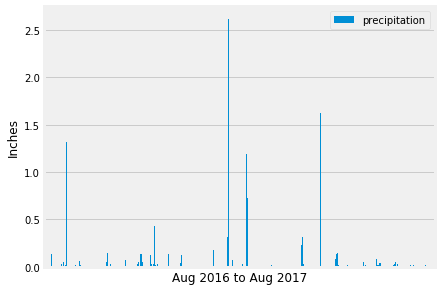

In [35]:
# Plot the 12 months of precipitaiton data
latestyr_date_prcp_df.set_index(['date'])
latestyr_date_prcp_df.plot.bar()
plt.xticks([])
plt.tight_layout()
plt.xlabel('Aug 2016 to Aug 2017')
plt.ylabel('Inches')
plt.show()

In [36]:
# Print the 12 month precipitation data summary statistics
latestyr_date_prcp_df.describe()

,precipitation
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Station Analysis

In [122]:
# Design a query to calculate the total number of stations.
locations = session.query(Measurement).group_by(Measurement.station).count()
print(locations)

9


In [138]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [139]:
# Query to identify the station with the highest number of observations
session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).first()

('USC00519281', 2772)

In [141]:
# Design a query to retrieve the last 12 months of temperature observation data (TOBS).
sel = [Measurement.date, Measurement.tobs]

latest_year_tobs = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-23').\
    group_by(Measurement.date, Measurement.station).all()
latest_year_tobs

[('2016-08-24', 77.0),
 ('2016-08-25', 80.0),
 ('2016-08-26', 80.0),
 ('2016-08-27', 75.0),
 ('2016-08-28', 73.0),
 ('2016-08-29', 78.0),
 ('2016-08-30', 77.0),
 ('2016-08-31', 78.0),
 ('2016-09-01', 80.0),
 ('2016-09-02', 80.0),
 ('2016-09-03', 78.0),
 ('2016-09-04', 78.0),
 ('2016-09-05', 78.0),
 ('2016-09-06', 73.0),
 ('2016-09-07', 74.0),
 ('2016-09-08', 80.0),
 ('2016-09-09', 79.0),
 ('2016-09-10', 77.0),
 ('2016-09-11', 80.0),
 ('2016-09-12', 76.0),
 ('2016-09-13', 79.0),
 ('2016-09-14', 75.0),
 ('2016-09-15', 79.0),
 ('2016-09-16', 78.0),
 ('2016-09-17', 79.0),
 ('2016-09-18', 78.0),
 ('2016-09-19', 78.0),
 ('2016-09-20', 76.0),
 ('2016-09-21', 74.0),
 ('2016-09-22', 77.0),
 ('2016-09-23', 78.0),
 ('2016-09-24', 79.0),
 ('2016-09-25', 79.0),
 ('2016-09-26', 77.0),
 ('2016-09-27', 80.0),
 ('2016-09-28', 78.0),
 ('2016-09-29', 78.0),
 ('2016-09-30', 78.0),
 ('2016-10-01', 77.0),
 ('2016-10-02', 79.0),
 ('2016-10-03', 79.0),
 ('2016-10-04', 79.0),
 ('2016-10-05', 79.0),
 ('2016-10-

In [90]:
# Cast 12 month tobs data into a dictionary
# This is for rendering it into JSON format in Flask app
year_tobs = {date:prcp for date, prcp in latest_year_tobs}

In [91]:
tobs_df = pd.DataFrame(latest_year_tobs, columns=['date', 'tobs'])
tobs_df

,date,tobs
0,2016-08-24,77.0
1,2016-08-25,80.0
2,2016-08-26,80.0
3,2016-08-27,75.0
4,2016-08-28,73.0
...,...,...
346,2017-08-14,77.0
347,2017-08-15,77.0
348,2017-08-16,76.0
349,2017-08-17,76.0


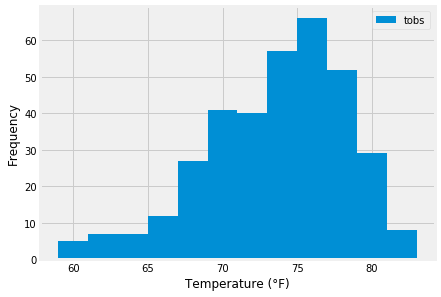

In [92]:
# Plot the temperatures onto a histogram
plt.hist(tobs_df['tobs'], bins = 12, label='tobs')
plt.legend(loc='upper right')
plt.tight_layout()
plt.xlabel('Temperature (°F)')
plt.ylabel('Frequency')
plt.show()

In [142]:
# Using the station id from the previous query, 
# calculate the lowest temperature recorded, 
# highest temperature recorded, 
# and average temperature of the most active station?
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

top_tobs = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-23').\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
top_tobs

('USC00519281', 59.0, 83.0, 73.0968660968661)

## Code for Flask App (app.py)

In [123]:
# To return JSON list of stations
# First create list of station id and station name using a JOIN
station_list = session.query(Measurement.station, Station.name).filter(Measurement.station == Station.station).all()
station_list

[('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, HI US'),
 ('USC00519397', 'WAIKIKI 717.2, H

In [67]:
# Cast this list into a dictionary
stn_dict = {station:name for station, name in station_list}
stn_dict

{'USC00519397': 'WAIKIKI 717.2, HI US',
 'USC00513117': 'KANEOHE 838.1, HI US',
 'USC00514830': 'KUALOA RANCH HEADQUARTERS 886.9, HI US',
 'USC00517948': 'PEARL CITY, HI US',
 'USC00518838': 'UPPER WAHIAWA 874.3, HI US',
 'USC00519523': 'WAIMANALO EXPERIMENTAL FARM, HI US',
 'USC00519281': 'WAIHEE 837.5, HI US',
 'USC00511918': 'HONOLULU OBSERVATORY 702.2, HI US',
 'USC00516128': 'MANOA LYON ARBO 785.2, HI US'}

In [143]:
# Using the station id from the previous query, 
# calculate the lowest temperature recorded, 
# highest temperature recorded, 
# and average temperature of the most active station?
sel = [Measurement.station, 
       func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]

tobs_stats = session.query(*sel).\
    filter(Measurement.station == 'USC00519281').\
    filter(Measurement.date > '2016-08-23').\
    group_by(Measurement.tobs).\
    order_by(func.count(Measurement.station).desc())
tobs_stats

In [115]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date=None, end_date=None):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    if end_date is None:
        end_date = session.query(func.max(Measurement.date))
        
    answer = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

    answer = list(np.ravel(answer))

    return answer

# function usage example
print(calc_temps('2012-02-28', '2012-03-01'))

[66.0, 71.23076923076923, 74.0]


# Bonus

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
